# Vader Count Vectorizer

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("sentiment results")

df1

,Text Filtering,Score,Compound Score,Vader Sentiment
0,"['mandalika', 'circuit', 'becam', 'favorit', '...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,"['mandalika', 'circuit', 'receiv', 'world', 'c...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,"['mandalika', 'circuit', 'favorit', 'world', '...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,"['world', 'class', 'motor', 'race', 'event', '...","{'neg': 0.08, 'neu': 0.698, 'pos': 0.223, 'com...",0.6486,Positive
4,"['mandalika', 'circuit', 'receiv', 'world', 'c...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
...,...,...,...,...
21682,"['mandalika', 'circuit', 'host', 'gt', 'world'...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
21683,"['mandalika', 'circuit', 'hold', 'gt', 'world'...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
21684,"['use', 'motorbik', 'tri', 'mandalika', 'circu...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
21685,"['statu', 'pak', 'de', 'instal', 'mandalika', ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


## Splitting the Data

In [2]:
# Define Y (This is the value we will predict)
X = df1["Text Filtering"]
y = df1["Vader Sentiment"]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Train Data:", len(X_train))
print("Test Data:", len(X_test))

Train Data: 17349
Test Data: 4338


## Implementation Count Vectorizer

In [4]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer1 = CountVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
response1 = count_vectorizer1.fit_transform(X_train)

In [5]:
df_countvectorizer1 = pd.DataFrame(response1.toarray(), columns=count_vectorizer1.get_feature_names())
df_countvectorizer1.head()

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aamiin,abal,abandon,abdul,abil,abilhudioro,abioq,abl,abov,abroad,...,young,youth,youtub,yu,yusuf,zainuddin,zarco,zone,zqscore,zulkieflimansyah
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Tranforming the Dataset

In [6]:
X_train = count_vectorizer1.transform(X_train)
X_test  = count_vectorizer1.transform(X_test)
print(f'Vader Count Data Transformed.')

Vader Count Data Transformed.


## Evaluate Model Function

In [7]:
from sklearn.ensemble import RandomForestClassifier

text_classifier1 = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
text_classifier1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [8]:
count_predictions1 = text_classifier1.predict(X_test)

## Random Forest Model  

Confusion Matrix Vader: 
 [[ 361   87   85]
 [   6 1978   23]
 [  24   89 1685]]
Classification report: 
               precision    recall  f1-score   support

    Negative       0.92      0.68      0.78       533
     Neutral       0.92      0.99      0.95      2007
    Positive       0.94      0.94      0.94      1798

    accuracy                           0.93      4338
   macro avg       0.93      0.87      0.89      4338
weighted avg       0.93      0.93      0.92      4338

Vader Sentimen Random Forest Classifier on Count Vectors: 0.9276164130935916


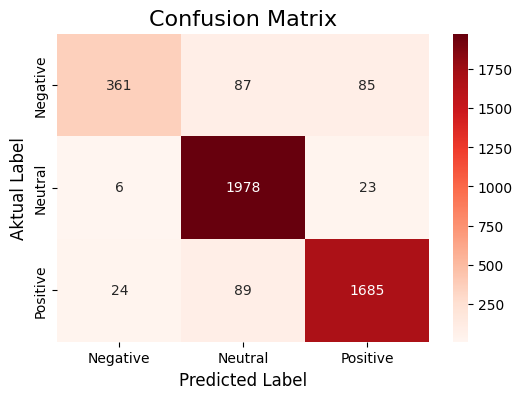

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

cm1 = confusion_matrix(y_test,count_predictions1)
cr1 = classification_report(y_test,count_predictions1)
rf_cv1 = accuracy_score(y_test,count_predictions1)
print('Confusion Matrix Vader: \n',cm1)
print('Classification report: \n',cr1)
print(f'Vader Sentimen Random Forest Classifier on Count Vectors: {rf_cv1}')

# plot confusion matrix 
plt.figure(figsize=(6,4))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm1, cmap=plt.cm.Reds, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Aktual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

# Vader TF-IDF

In [10]:
import pandas as pd
import numpy as np

df2 = pd.read_csv("sentiment results")

df2

,Text Filtering,Score,Compound Score,Vader Sentiment
0,"['mandalika', 'circuit', 'becam', 'favorit', '...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,"['mandalika', 'circuit', 'receiv', 'world', 'c...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,"['mandalika', 'circuit', 'favorit', 'world', '...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,"['world', 'class', 'motor', 'race', 'event', '...","{'neg': 0.08, 'neu': 0.698, 'pos': 0.223, 'com...",0.6486,Positive
4,"['mandalika', 'circuit', 'receiv', 'world', 'c...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
...,...,...,...,...
21682,"['mandalika', 'circuit', 'host', 'gt', 'world'...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
21683,"['mandalika', 'circuit', 'hold', 'gt', 'world'...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
21684,"['use', 'motorbik', 'tri', 'mandalika', 'circu...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
21685,"['statu', 'pak', 'de', 'instal', 'mandalika', ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


## Splitting the Data

In [11]:
# Define Y (This is the value we will predict)
X = df2["Text Filtering"]
y = df2["Vader Sentiment"]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Train Data:", len(X_train))
print("Test Data:", len(X_test))

Train Data: 17349
Test Data: 4338


## Implementation TF-IDF

In [13]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer2 = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
response2 = tfidf_vectorizer2.fit_transform(X_train)

In [14]:
df_tfidf_vectorizer2= pd.DataFrame(response2.toarray(), columns=tfidf_vectorizer2.get_feature_names())
df_tfidf_vectorizer2.head()

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aamiin,abal,abandon,abdul,abil,abilhudioro,abioq,abl,abov,abroad,...,young,youth,youtub,yu,yusuf,zainuddin,zarco,zone,zqscore,zulkieflimansyah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Tranforming the Dataset

In [15]:
X_train = tfidf_vectorizer2.transform(X_train)
X_test  = tfidf_vectorizer2.transform(X_test)
print(f'Vader TF IDF Data Transformed.')

Vader TF IDF Data Transformed.


## Evaluate Model Function 

In [16]:
from sklearn.ensemble import RandomForestClassifier

text_classifier2 = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
text_classifier2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [17]:
tfidf_predictions2 = text_classifier2.predict(X_test)

## Random Forest Model 

Confusion matrix: 
 [[ 344  102   87]
 [   5 1978   24]
 [  23   90 1685]]
Classification report: 
               precision    recall  f1-score   support

    Negative       0.92      0.65      0.76       533
     Neutral       0.91      0.99      0.95      2007
    Positive       0.94      0.94      0.94      1798

    accuracy                           0.92      4338
   macro avg       0.92      0.86      0.88      4338
weighted avg       0.92      0.92      0.92      4338

Vader Sentimen Random Forest Classifier on TF-IDF Vectors: 0.9236975564776395


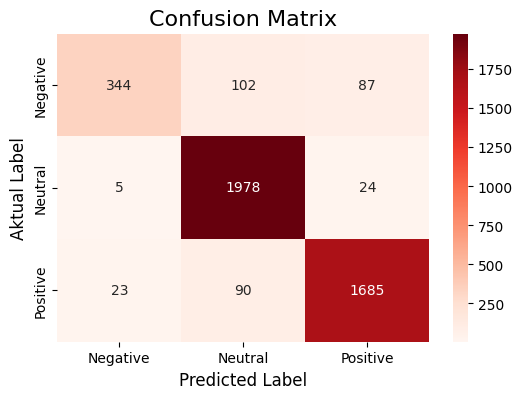

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

cm2 = confusion_matrix(y_test,tfidf_predictions2)
cr2 = classification_report(y_test,tfidf_predictions2)
rf_tfidf2 = accuracy_score(y_test,tfidf_predictions2)
print('Confusion matrix: \n',cm2)
print('Classification report: \n',cr2)
print(f'Vader Sentimen Random Forest Classifier on TF-IDF Vectors: {rf_tfidf2}')

# plot confusion matrix 
plt.figure(figsize=(6,4))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm2, cmap=plt.cm.Reds, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Aktual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

## Comparison of Word Weighting Results 

In [19]:
import pandas as pd
model = {'Model':['Vader Random Forest Classifier - Count Vectors', 
                  'Vader Random Forest Classifier - TFIDF Vectors',
                 ],
         'Accuracy Score':[rf_cv1, rf_tfidf2]
         }
model_df = pd.DataFrame(model)
model_df

,Model,Accuracy Score
0,Vader Random Forest Classifier - Count Vectors,0.927616
1,Vader Random Forest Classifier - TFIDF Vectors,0.923698
